In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Classified Data to Classified Data


In [0]:
df = pd.read_csv('Classified Data')

In [0]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [0]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))

In [0]:
df_feat=pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [0]:
df_feat

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X= df_feat
y= df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
prediction= knn.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[159  14]
 [ 14 143]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       173
           1       0.91      0.91      0.91       157

    accuracy                           0.92       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.92      0.92      0.92       330



In [0]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))


Text(0, 0.5, 'Error Rate')

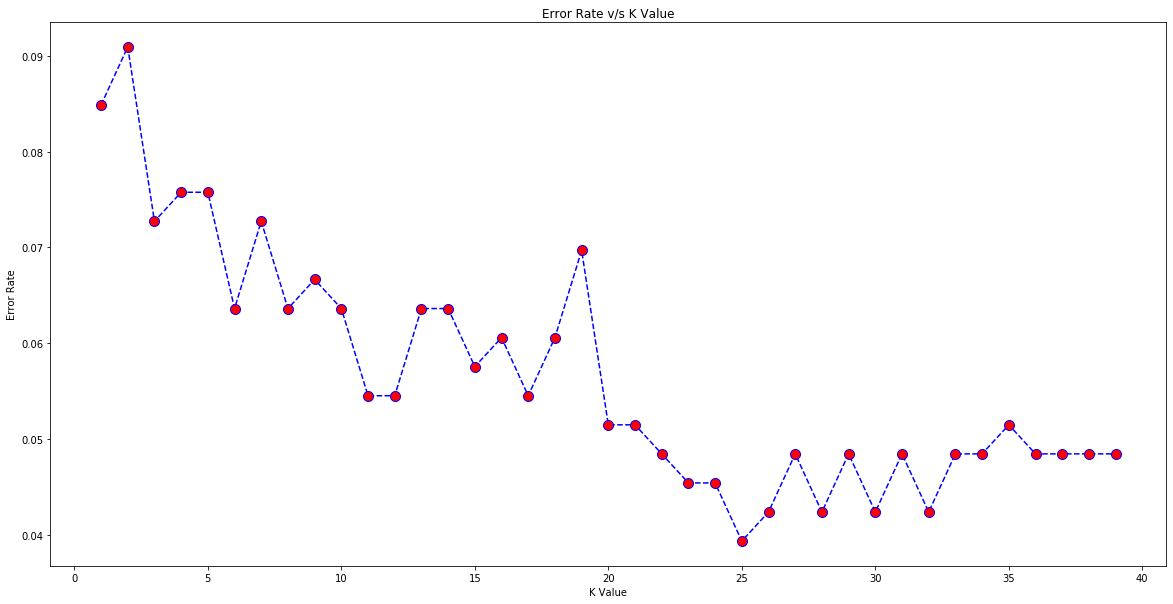

In [0]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate v/s K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [0]:
print(error_rate, sep='\n')

[0.08484848484848485, 0.09090909090909091, 0.07272727272727272, 0.07575757575757576, 0.07575757575757576, 0.06363636363636363, 0.07272727272727272, 0.06363636363636363, 0.06666666666666667, 0.06363636363636363, 0.05454545454545454, 0.05454545454545454, 0.06363636363636363, 0.06363636363636363, 0.05757575757575758, 0.06060606060606061, 0.05454545454545454, 0.06060606060606061, 0.0696969696969697, 0.051515151515151514, 0.051515151515151514, 0.048484848484848485, 0.045454545454545456, 0.045454545454545456, 0.03939393939393939, 0.04242424242424243, 0.048484848484848485, 0.04242424242424243, 0.048484848484848485, 0.04242424242424243, 0.048484848484848485, 0.04242424242424243, 0.048484848484848485, 0.048484848484848485, 0.051515151515151514, 0.048484848484848485, 0.048484848484848485, 0.048484848484848485, 0.048484848484848485]


In [0]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[159  14]
 [ 14 143]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       173
           1       0.91      0.91      0.91       157

    accuracy                           0.92       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.92      0.92      0.92       330

